In [1]:
%matplotlib inline
import netCDF4 
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

Location: Golfo de Penas (chilean Patagonia).

Geo-cordinates (image subset):
- NLb = -44.531
- WLb = -75.854
- SLb = -47.584
- ELb = -74.462

**DATE: 2022/02/21**

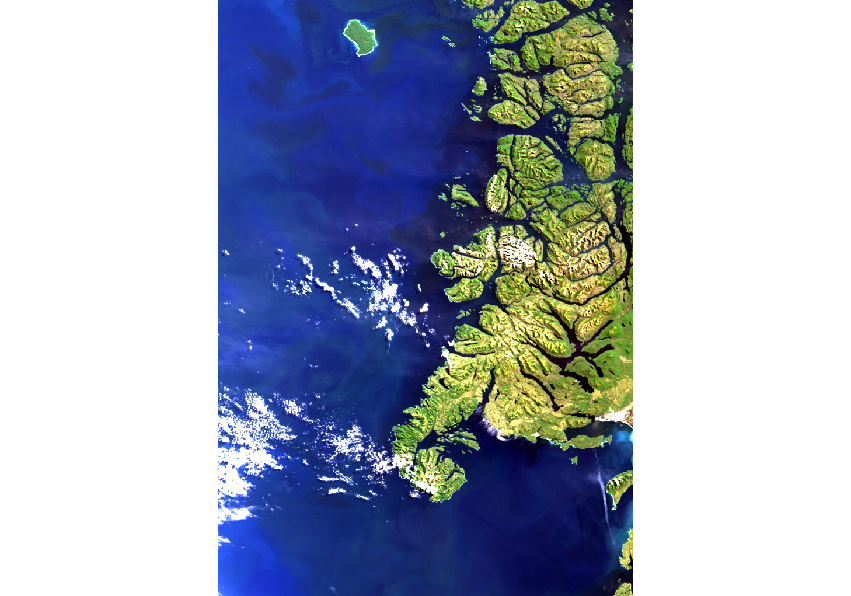

In [2]:
# Xarray dataset from SNAP (Sentinel Application Plataform) C2RCC Processor
file = 'subset4_20220221T142438_C2RCC.nc'
ds = xr.open_dataset(file)
print('data size:',ds.nbytes/1e6, 'MB')
ds

data size: 130.85136 MB


<xarray.Dataset>
Dimensions:                                            (y: 1021, x: 712)
Coordinates:
    lat                                                (y, x) float64 ...
    lon                                                (y, x) float64 ...
Dimensions without coordinates: y, x
Data variables: (12/41)
    conc_tsm                                           (y, x) float32 ...
    conc_chl                                           (y, x) float32 ...
    unc_tsm                                            (y, x) float32 ...
    unc_chl                                            (y, x) float32 ...
    TP_latitude                                        (y, x) float32 ...
    TP_longitude                                       (y, x) float32 ...
    ...                                                 ...
    horizontal_wind_vector_1                           (y, x) float32 ...
    horizontal_wind_vector_2                           (y, x) float32 ...
    humidity                                           (y, x) float32 ...
    sea_level_pressure                                 (y, x) float32 ...
    total_columnar_water_vapour                        (y, x) float32 ...
    total_ozone                                        (y, x) float32 ...
Attributes:
    Conventions:  CF-1.4
    TileSize:     511:356
    start_date:   21-FEB-2022 14:24:45.073048
    stop_date:    21-FEB-2022 14:25:29.963024

In [3]:
# Checking all variables
nc = netCDF4.Dataset(file, mode='r')
nc.variables.keys()

dict_keys(['conc_tsm', 'conc_chl', 'unc_tsm', 'unc_chl', 'TP_latitude', 'TP_longitude', 'OAA', 'OZA', 'SAA', 'SZA', 'atmospheric_temperature_profile_pressure_level_1', 'atmospheric_temperature_profile_pressure_level_2', 'atmospheric_temperature_profile_pressure_level_3', 'atmospheric_temperature_profile_pressure_level_4', 'atmospheric_temperature_profile_pressure_level_5', 'atmospheric_temperature_profile_pressure_level_6', 'atmospheric_temperature_profile_pressure_level_7', 'atmospheric_temperature_profile_pressure_level_8', 'atmospheric_temperature_profile_pressure_level_9', 'atmospheric_temperature_profile_pressure_level_10', 'atmospheric_temperature_profile_pressure_level_11', 'atmospheric_temperature_profile_pressure_level_12', 'atmospheric_temperature_profile_pressure_level_13', 'atmospheric_temperature_profile_pressure_level_14', 'atmospheric_temperature_profile_pressure_level_15', 'atmospheric_temperature_profile_pressure_level_16', 'atmospheric_temperature_profile_pressure_lev

In [4]:
# Variables of interest
con_chl = nc.variables['conc_chl']
con_tsm = nc.variables['conc_tsm']

In [5]:
chl = np.array(con_chl)
tsm = np.array(con_tsm)

In [6]:
# DataFrame with chl and tsm values 
df = pd.DataFrame(data={'chl' : chl.flatten(), 'tsm' : tsm.flatten()})

In [7]:
df.describe()

,chl,tsm
count,726952.000000,726952.000000
mean,1.885583,1.298842
std,5.315846,7.184963
min,0.000000,0.000000
25%,0.260545,0.067001
50%,1.318985,0.824793
75%,1.736981,1.166599
max,93.526901,319.177856


In [8]:
df.to_csv("/Users/smart/Downloads/chl-tsm-21-02-II.csv", index=False)

In [9]:
# uncertainty or error of chl and tsm values
u_chl = nc.variables['unc_chl']
u_tsm = nc.variables['unc_tsm']

In [10]:
chl_unc = np.array(u_chl)
tsm_unc = np.array(u_tsm)

In [11]:
# Dataframe
df_u = pd.DataFrame(data={'chl_unc' : chl_unc.flatten(), 'tsm_unc' : tsm_unc.flatten()})

In [12]:
df_u.describe()

,chl_unc,tsm_unc
count,726952.000000,726952.000000
mean,0.225798,0.167203
std,0.630750,1.202751
min,0.000000,0.000000
25%,0.048160,0.011718
50%,0.160431,0.079934
75%,0.196768,0.118047
max,39.031574,85.016495


In [13]:
df_u.to_csv("/Users/smart/Downloads/unc-21-02-II.csv", index=False)

### Chlorophyll a

(array([[945.,  13.,   6., ...,  13.,   3.,   0.],
        [950.,   7.,   9., ...,  14.,   2.,   0.],
        [943.,  16.,   5., ...,   6.,   4.,   0.],
        ...,
        [993.,  20.,   3., ...,   0.,   0.,   0.],
        [990.,  16.,   7., ...,   0.,   0.,   0.],
        [991.,  19.,   4., ...,   0.,   0.,   0.]]),
 array([ 0.      ,  9.35269 , 18.70538 , 28.058071, 37.41076 , 46.76345 ,
        56.116142, 65.468834, 74.82152 , 84.17421 , 93.5269  ],
       dtype=float32),
 <a list of 712 BarContainer objects>)

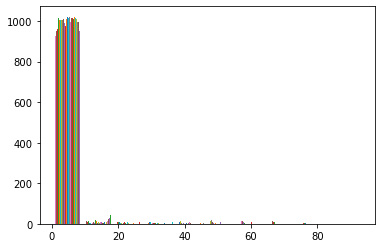

In [14]:
# quick view of values distribution
plt.hist(chl)

In [15]:
# chl concentration under 5 ug m-3
chl_values = df.chl[df["chl"]<=5.00]

In [16]:
chl_values.describe()

count    702363.000000
mean          1.182841
std           0.903996
min           0.000000
25%           0.019315
50%           1.292437
75%           1.679656
max           4.998534
Name: chl, dtype: float64

In [17]:
# chl concentration over 5 ug m-3
chl_high_values = df.chl[df["chl"]>=5.00]

In [18]:
chl_high_values.describe()

count    24589.000000
mean        21.958488
std         19.912090
min          5.000741
25%          7.647223
50%         11.735951
75%         31.693336
max         93.526901
Name: chl, dtype: float64

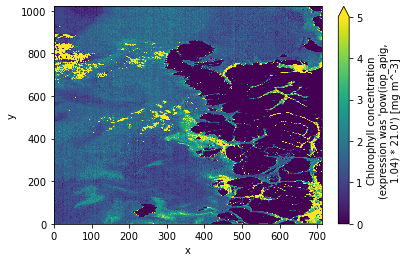

In [19]:
# Chlorophyll a map with matplotlib
ds.conc_chl.plot(vmin = 0, vmax = 5)

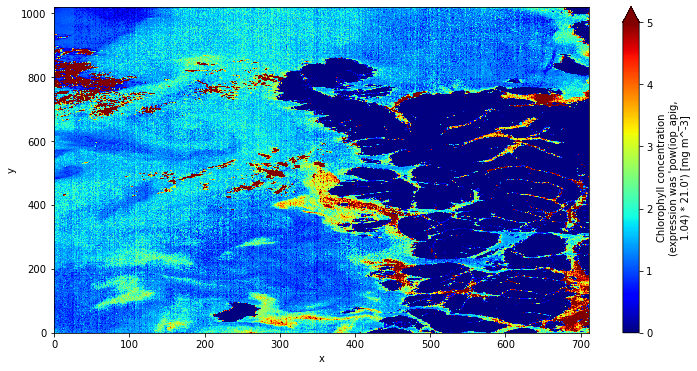

In [20]:
# another map
fig,ax=plt.subplots(figsize=(12,6))
ds.conc_chl.plot(vmin=0, vmax=5, cmap='jet',ax=ax)

#### SNAP chlorophyll a concentration with cloud risk mask

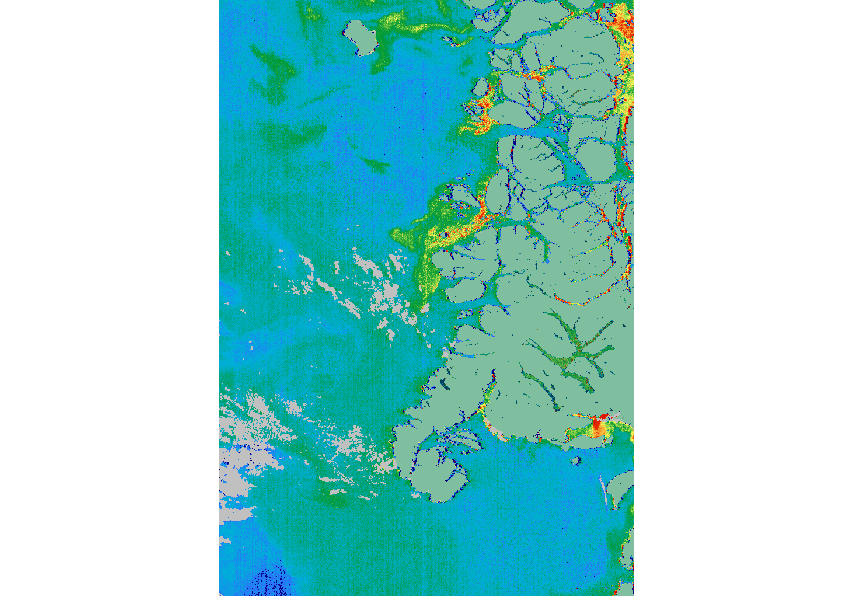

C:\Users\smart\Anaconda3\envs\mlpycaret\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


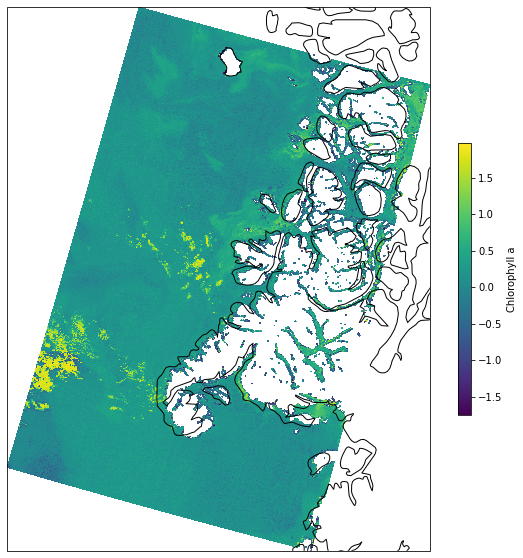

In [21]:
#Log10 scale of chlorophyll a map

import rasterio
import cartopy.crs as ccrs
proj = ccrs.Mercator()
data_crs = ccrs.PlateCarree()

plt.figure( figsize=(10,10))
ax = plt.axes(projection=proj)


# defining the variables to plot
## log transformation
conc_chl = np.log10(ds.conc_chl)
lat = ds.lat
lon = ds.lon

plt.pcolor(lon, lat, conc_chl, transform = data_crs)

plt.colorbar(label = 'Chlorophyll a', shrink=0.5)

ax.coastlines('10m')

plt.show()

#### TSM (Total Suspended Matter)

(array([[1.015e+03, 3.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.014e+03, 5.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.016e+03, 1.000e+00, 1.000e+00, ..., 1.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [1.013e+03, 3.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.017e+03, 1.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
         2.000e+00],
        [1.017e+03, 2.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         1.000e+00]]),
 array([  0.      ,  31.917786,  63.83557 ,  95.75336 , 127.67114 ,
        159.58893 , 191.50671 , 223.4245  , 255.34229 , 287.26007 ,
        319.17786 ], dtype=float32),
 <a list of 712 BarContainer objects>)

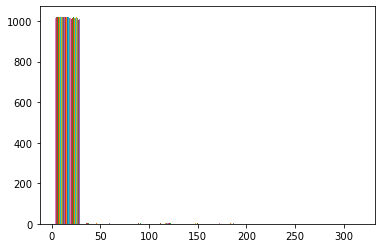

In [22]:
# quick view of values distribution
plt.hist(tsm)

In [23]:
# tsm concentration under 20 mg m-3
tsm_values = df.tsm[df["tsm"]<=20.00]

In [24]:
tsm_values.describe()

count    723134.000000
mean          0.892761
std           1.337562
min           0.000000
25%           0.047246
50%           0.821302
75%           1.160521
max          19.990503
Name: tsm, dtype: float64

In [25]:
# tsm concentration over 20 mg m-3
tsm_high_values = df.tsm[df["tsm"]>=20.00]

In [26]:
tsm_high_values.describe()

count    3818.000000
mean       78.217285
std        59.614178
min        20.006693
25%        26.055909
50%        53.997749
75%       114.840508
max       319.177856
Name: tsm, dtype: float64

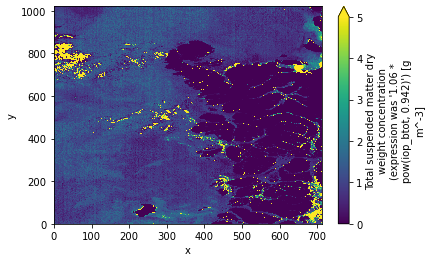

In [27]:
# TSM map with matplotlib
ds.conc_tsm.plot(vmin = 0, vmax = 5)

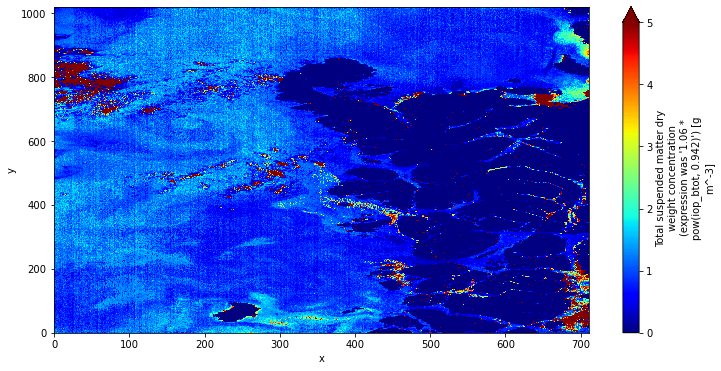

In [28]:
fig,ax=plt.subplots(figsize=(12,6))
ds.conc_tsm.plot(vmin=0, vmax=5, cmap='jet',ax=ax)

#### SNAP picture TSM concentration


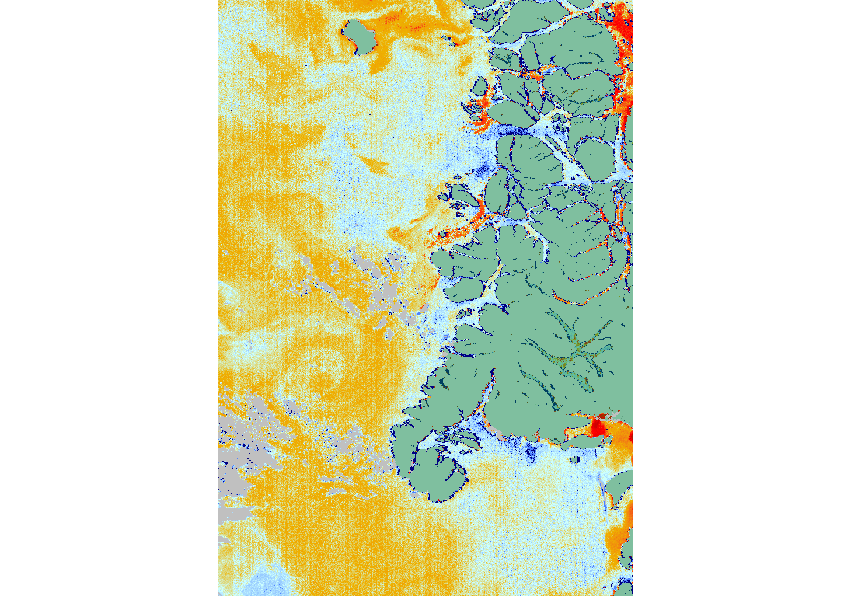